In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 def get_books(year):
        
    url =f"https://www.amazon.com/gp/bestsellers/{year}/books"

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",
               "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url,headers = headers)
    soup =BeautifulSoup(page.content, 'html.parser')

    #get all books

    lists = soup.find_all(id = 'gridItemRoot')
    
    return lists


In [3]:

def get_dir(book,year): 
    import numpy as np
    '''to get the name of price'''

    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
    try:
        ranks = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        ranks = np.nan
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    try:
        no_of_reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        no_of_reviews = np.nan
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    year = year
    return [price,ranks,title,no_of_reviews,ratings,author, year]
    
    

In [4]:
def get_data(books, year):
    data = [get_dir(book,year) for book in books]
    return data

In [5]:
def get_dict(data,year):


    df_list = []       

    for book in data:

        df_list.append( {'year': book[6],
                         'price':book[0],
                         'ranks':book[1],
                         'title':book[2],
                         'no_of_reviews':book[3],
                         'ratings':book[4],
                         'author':book[5]})
    return df_list

    

In [6]:
def df(year):
    #v = get_books(year)
    #c = get_data(get_books(year),year)
    y = get_dict(get_data(get_books(year),year), year)
    return y

In [7]:
df('2021')

[{'year': '2021',
  'price': '11.98',
  'ranks': '1',
  'title': 'Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
  'no_of_reviews': '85,117',
  'ratings': '4.8',
  'author': 'James Clear'},
 {'year': '2021',
  'price': '12.52',
  'ranks': '2',
  'title': 'American Marxism',
  'no_of_reviews': '34,840',
  'ratings': '4.8',
  'author': 'Mark R. Levin'},
 {'year': '2021',
  'price': '7.74',
  'ranks': '3',
  'title': 'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
  'no_of_reviews': '87,227',
  'ratings': '4.7',
  'author': 'Don Miguel Ruiz'},
 {'year': '2021',
  'price': '4.14',
  'ranks': '4',
  'title': 'If Animals Kissed Good Night',
  'no_of_reviews': '69,842',
  'ratings': '4.8',
  'author': 'Ann Whitford Paul'},
 {'year': '2021',
  'price': '11.40',
  'ranks': '5',
  'title': 'The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma',
  'no_of_reviews': '56,544',
  'ratings': '4.8',
  'author': 'Besse

In [8]:
df_books = pd.DataFrame(df(2021), columns = ['year','price','ranks','title','no_of_reviews','ratings','author'])
df_books 

,year,price,ranks,title,no_of_reviews,ratings,author
0,2021,11.98,1,Atomic Habits: An Easy & Proven Way to Build G...,"85,117",4.8,James Clear
1,2021,12.52,2,American Marxism,"34,840",4.8,Mark R. Levin
2,2021,7.74,3,The Four Agreements: A Practical Guide to Pers...,"87,227",4.7,Don Miguel Ruiz
3,2021,4.14,4,If Animals Kissed Good Night,"69,842",4.8,Ann Whitford Paul
4,2021,11.40,5,"The Body Keeps the Score: Brain, Mind, and Bod...","56,544",4.8,Bessel van der Kolk M.D.
5,2021,4.31,6,I Love You to the Moon and Back,"60,545",4.9,Amelia Hepworth
6,2021,9.99,7,It Ends with Us: A Novel (1),"174,623",4.7,Colleen Hoover
7,2021,10.35,8,"The Boy, the Mole, the Fox and the Horse","108,570",4.8,Charlie Mackesy
8,2021,4.93,9,The Very Hungry Caterpillar,"54,432",4.9,Eric Carle
9,2021,4.07,10,My First Learn-to-Write Workbook: Practice for...,"77,734",4.8,Crystal Radke


In [9]:
V1 = df_books .groupby(['ratings'] ,as_index=False)['author'].agg(['count']).reset_index()
V1

,ratings,count
0,4.3,2
1,4.5,1
2,4.6,5
3,4.7,6
4,4.8,10
5,4.9,5


<AxesSubplot:xlabel='ratings'>

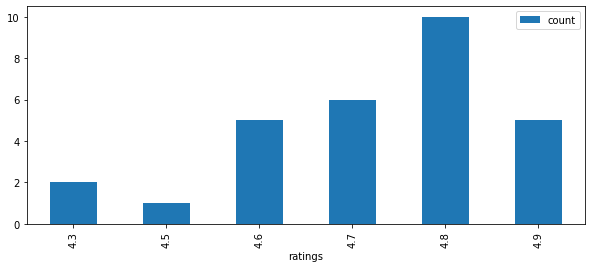

In [10]:
V1.plot(x='ratings', y='count', kind="bar", figsize=[10, 4])

In [19]:
V2=df_books.author.value_counts().head(15)
V2

James Clear              1
Robert F. Kennedy Jr.    1
Brené Brown              1
Wonder House Books       1
Frank Herbert            1
Glennon Doyle            1
Bob Woodward             1
George Orwell            1
Sharon Jones             1
Gary Chapman             1
Robert T. Kiyosaki       1
Dr. Seuss                1
Robert Greene            1
Taylor Jenkins Reid      1
Jeff Kinney              1
Name: author, dtype: int64

<AxesSubplot:>

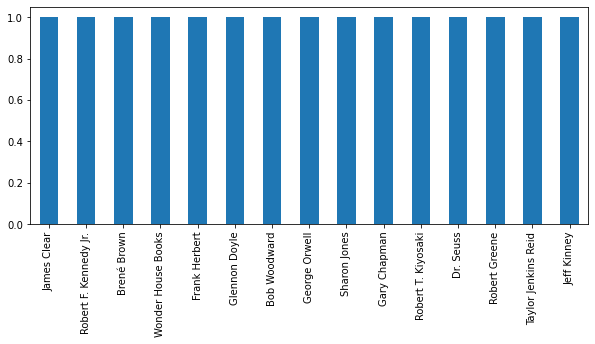

In [20]:
V2.plot(x='ratings', y='count', kind="bar", figsize=[10, 4])

In [34]:
V3 = df_books .groupby(['price'] ,as_index=False)['author'].agg(['count']).reset_index().head(10)
V3

,price,count
0,10.34,1
1,10.35,1
2,11.40,1
3,11.60,1
4,11.98,1
5,12.01,1
6,12.52,1
7,13.08,1
8,13.29,1
9,13.79,1


<AxesSubplot:xlabel='price'>

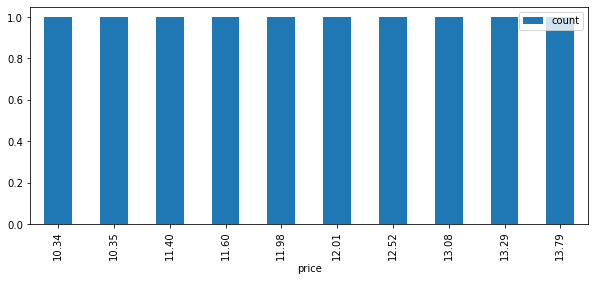

In [35]:
V3.plot(x='price', y='count', kind="bar", figsize=[10, 4])

In [39]:
V4 = df_books .groupby(['no_of_reviews'] ,as_index=False)['author'].agg(['count']).reset_index().head(10)
V4

,no_of_reviews,count
0,"108,570",1
1,"114,442",1
2,"121,857",1
3,"127,907",1
4,"15,393",1
5,"174,623",1
6,"20,649",1
7,"20,664",1
8,"200,918",1
9,"21,354",1


<AxesSubplot:xlabel='no_of_reviews'>

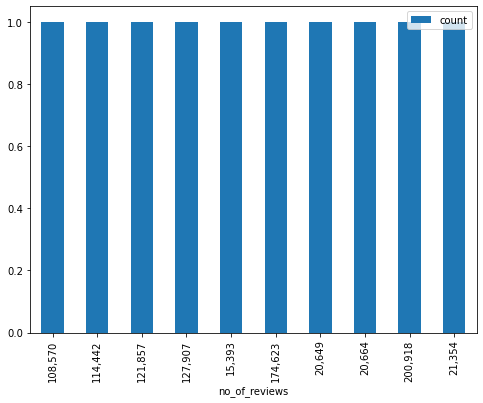

In [44]:
V4.plot(x='no_of_reviews', y='count', kind="bar", figsize=[8, 6])